<h3>Installing Packages</h3>

In this module, we will need pandas and numpy. Numpy should be available from the previous module, to install pandas:

- If you are using Windows, open a new command prompt and run
    - pip install pandas
    
- If you are using Mac or Linux, open a new terminal and run
    - sudo pip install pandas

<h3> Introduction to Pandas </h3>

As we have established, raw data coming in is almost never clean. You need to do a lot of preprocessing (e.g. add/remove features, clean coded values, dealing with missing values, merge multiple data sources...). Last time we discussed numpy which is very powerful, but is not too friendly for users whose backgrounds lie more in applied data analytics. In this module, we are going to learn <b>Pandas</b> - another Python package for data manipulation. Unlike numpy, pandas is designed fully towards data analytics and data processing and can be used for these following purposes:
- Loading data
- Manipulating data (i.e. preprocessing), may combine with scikit-learn
- Exploring data (some calls it preliminary analysis), may combine with visualization with matplotlib

Throughout this module, we will be working with the <b>stroke</b> data. A small sample of the data is as below.

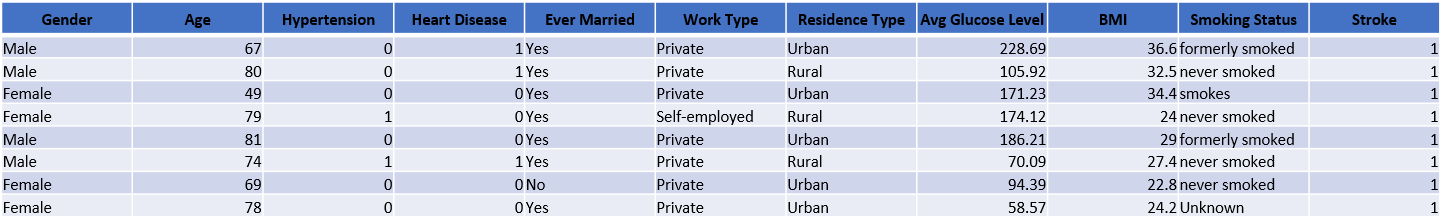

In this case, the input data has a 2D structure -- the tabular data type that we discussed in module 1. Please note that this 2D refers to the structure of the data and is different from the dimensionality of the input data space, which is 11 in this case (meaning the input data has 11 features, including the target which will be discussed later).

<h3> Pandas Data Structure </h3>

1. Series: 1D array like structure (can also be called vector). In general, the label, after being extracted from the raw data, will be stored in a Pandas series (or a 1D numpy array). Another example is that you can store daily close price of a stock in an 1D series:
    - 129 128.5 129.7 130 132.4 132.5 133 ...
2. DataFrame: 2D structure. The input data in the example can be stored in a Pandas DataFrame
    - Probably most (if not all) datasets with which you will be working in this course will be a DataFrame.
    - Unless you would like to work with time series, signals, or images
3. Panel: 3D structure. We won't likely work with this structure for this course. For image data, we will be using Numpy instead.

<h3> Loading Data </h3>

First, import pandas and alias it as <b>pd</b> (so it's more convenient to refer to the module). The data we use is the Brain Stroke Prediction dataset, available in https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset. The data consists of the following columns:

- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
- evermarried: "No" or "Yes"
- worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 
- Residencetype: "Rural" or "Urban"
- avgglucoselevel: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

The "stroke" column will be the target in this data. We will use the read_csv() function to load the dataset. The dataset is then stored in a variable named "stroke". 

After the loading/assignment, we can call the variable to look at its (summarized) contents. We can immediately see the output of pandas is much different from numpy in that it represents a dataset much better (than the matrix format of numpy)

In [1]:
import pandas as pd

stroke = pd.read_csv('stroke.csv')
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Note: it is very important to know the format of the data file so we can load it correctly. The file "stroke.csv" is a comma-delimited file in which rows are defined by lines, and fields in each columns are separated by comma ",". 

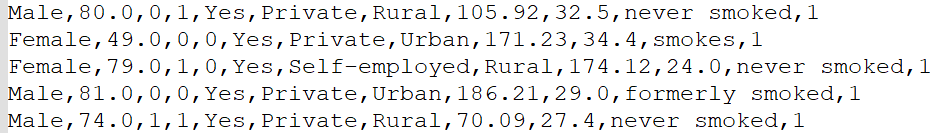

However, csv files, while common, are not guaranteed all the times. Fields may be separated by other characters, for examples, "|", so if it is possible, you should <b>always look at the raw data file first</b>. Other information that may be needed include whether the file consists of columns' names or special characters (e.g., from other languages). These will affect the settings of our read_csv() function.

For example, the file "stroke_bar.csv" use the "|" instead of ",". It also does not have column names.

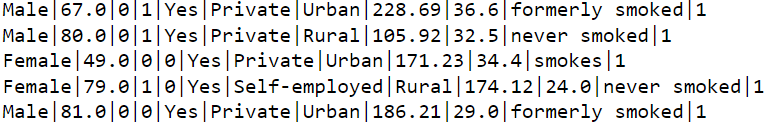

In this case, using the default settings of read_csv, our data will be loaded incorrectly. As you can see below, everything is read into one column. The first row becomes the column's name.

In [2]:
stroke_2 = pd.read_csv('stroke_bar.csv')
stroke_2

,Male|67.0|0|1|Yes|Private|Urban|228.69|36.6|formerly smoked|1
0,Male|80.0|0|1|Yes|Private|Rural|105.92|32.5|ne...
1,Female|49.0|0|0|Yes|Private|Urban|171.23|34.4|...
2,Female|79.0|1|0|Yes|Self-employed|Rural|174.12...
3,Male|81.0|0|0|Yes|Private|Urban|186.21|29.0|fo...
4,Male|74.0|1|1|Yes|Private|Rural|70.09|27.4|nev...
...,...
4975,Male|41.0|0|0|No|Private|Rural|70.15|29.8|form...
4976,Male|40.0|0|0|Yes|Private|Urban|191.15|31.1|sm...
4977,Female|45.0|1|0|Yes|Govt_job|Rural|95.02|31.8|...
4978,Male|40.0|0|0|Yes|Private|Rural|83.94|30.0|smo...


If the delimiter is not ",", we can change the argument sep= to the correct character. header=None will help fix the issue with files without columns' names

In [3]:
stroke_3 = pd.read_csv('stroke_bar.csv', sep="|", header=None)
stroke_3

,0,1,2,3,4,5,6,7,8,9,10
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


The columns' names are just numbers now, however. We can change that if wished using the columns property of the dataframe.

In [4]:
stroke_3.columns = ['gender','age','hypertension','heart_disease',
                    'ever_married','work_type','Residence_type',
                    'avg_glucose_level','bmi','smoking_status','stroke']

stroke_3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


stroke_2 and stroke_3 are just for demonstration purpose. Henceforth, we will only use the stroke dataframe.

<b>Self-research note: please read about fixed-width data format and how to import them using pandas</b>

Another useful information to look at is the data type of each column in the loaded dataframe. We can access this using dtypes. You should always verify that numerical columns are read in as either float or int. Only class columns should be object. If a numerical column is having object type, it may consists of text values in the datafile, in which case we should examine more closely to resolve the issue. This is very important later on since numerical columns and class columns are processed differently.

In [5]:
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

we can use the head() method to look at several first rows in a dataframe

In [6]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<h3> Working with DataFrame </h3>

<h4> Slicing </h4>

Slicing a pandas dataframe is conceptually similar to slicing a numpy array, however, the syntax is different.

Using a single index results directly from a dataframe in pandas trying to select <b>columns instead of rows</b> like in numpy. In dataframes that have headers, using numeric index results in error. You have to use the columns' names instead.

In [7]:
stroke[0]

KeyError: 0

the selected column will be viewed as a 1D series

In [8]:
stroke['age']

0       67.0
1       80.0
2       49.0
3       79.0
4       81.0
        ... 
4976    41.0
4977    40.0
4978    45.0
4979    40.0
4980    80.0
Name: age, Length: 4981, dtype: float64

we can select multiple columns which result in a dataframe

In [9]:
stroke[['age','work_type','stroke']]

,age,work_type,stroke
0,67.0,Private,1
1,80.0,Private,1
2,49.0,Private,1
3,79.0,Self-employed,1
4,81.0,Private,1
...,...,...,...
4976,41.0,Private,0
4977,40.0,Private,0
4978,45.0,Govt_job,0
4979,40.0,Private,0


Row slicing can be added after columns in a <b>different</b> bracket system

In [10]:
stroke[['age','work_type','stroke']][10:20]

,age,work_type,stroke
10,54.0,Private,1
11,79.0,Private,1
12,50.0,Self-employed,1
13,64.0,Private,1
14,75.0,Private,1
15,60.0,Private,1
16,71.0,Govt_job,1
17,52.0,Self-employed,1
18,79.0,Self-employed,1
19,82.0,Private,1


To have a slicing syntax that is closer to numpy, we use DataFrame.loc or DataFrame.iloc to slice DataFrame. You need to provide two slicing conditions, one for row slicing and one for column slicing: 

<b>DataFrame.loc[{row condition} , {column condition}]</b>    <== this is to slice columns using their names

or 

<b>DataFrame.iloc[{row condition} , {column condition}]</b>   <== this is to slice columns using their numeric index

<b><i>An important note when slicing a pandas dataframe with loc is that the end_index will now be included in the result</i></b>

In [11]:
stroke.loc[[10,60,110,200],['age','ever_married','smoking_status']]

,age,ever_married,smoking_status
10,54.0,Yes,smokes
60,52.0,Yes,never smoked
110,68.0,Yes,never smoked
200,66.0,Yes,formerly smoked


In [7]:
stroke.loc[:99:3,['age','ever_married','smoking_status']]

,age,ever_married,smoking_status
0,67.0,Yes,formerly smoked
3,79.0,Yes,never smoked
6,69.0,No,never smoked
9,61.0,Yes,smokes
12,50.0,Yes,never smoked
15,60.0,No,never smoked
18,79.0,Yes,never smoked
21,80.0,Yes,never smoked
24,57.0,Yes,smokes
27,80.0,Yes,formerly smoked


In [8]:
stroke.loc[60:100:4,'heart_disease':'bmi']

,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
60,0,Yes,Private,Rural,96.59,26.4
64,0,Yes,Self-employed,Urban,143.43,45.9
68,0,Yes,Private,Rural,96.97,29.1
72,0,Yes,Private,Urban,98.55,25.6
76,0,Yes,Self-employed,Urban,68.56,26.2
80,1,Yes,Private,Rural,240.59,31.4
84,0,Yes,Govt_job,Rural,190.32,31.4
88,0,Yes,Private,Rural,73.18,30.3
92,1,Yes,Private,Rural,129.98,22.6
96,0,Yes,Self-employed,Rural,76.11,27.3


In [9]:
#to use column indices instead of their names, we use iloc 
stroke.iloc[[10,40,70,210,1004], [1,3,5,7]]

,age,heart_disease,work_type,avg_glucose_level
10,54.0,0,Private,104.51
40,81.0,0,Self-employed,99.33
70,70.0,1,Private,59.35
210,8.0,0,Private,110.89
1004,23.0,0,Private,63.73


Using iloc, however, the slicing becomes identical to numpy. The end_index will now <b>not</b> be included. This is very important to remember, since incorrect index may lead to the target being included in the feature set which make any models meaningless. 

To be certain, <b>always print</b> the slicing result so you can verify it is as you expect.

In [10]:
stroke.iloc[:30, 4:-1]

,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Yes,Private,Rural,105.92,32.5,never smoked
2,Yes,Private,Urban,171.23,34.4,smokes
3,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Yes,Private,Urban,186.21,29.0,formerly smoked
5,Yes,Private,Rural,70.09,27.4,never smoked
6,No,Private,Urban,94.39,22.8,never smoked
7,Yes,Private,Urban,58.57,24.2,Unknown
8,Yes,Private,Rural,80.43,29.7,never smoked
9,Yes,Govt_job,Rural,120.46,36.8,smokes


Similar to a numpy array, we can slice a dataframe using conditions with both with loc and iloc. You have to make sure the columns are in their correct data types to avoid unexpected results or errors. For examples, compare an object column to a number may cause weird behaviours.

In [11]:
stroke.loc[stroke['age']<=30,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
208,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
221,Female,20.00,0,0,No,Private,Urban,84.62,19.7,smokes,0
229,Female,25.00,0,0,Yes,Private,Urban,60.84,24.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4959,Female,17.00,0,0,No,Private,Urban,92.97,26.5,formerly smoked,0
4960,Female,18.00,0,0,No,Private,Rural,101.12,26.4,smokes,0
4962,Male,3.00,0,0,No,children,Rural,194.75,20.1,Unknown,0
4963,Female,20.00,0,0,No,Govt_job,Rural,79.53,26.5,never smoked,0


In [12]:
stroke.loc[stroke['ever_married']=='Yes',:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


we can combine conditions, <b>'&'</b> for <b>and</b>, and <b>'|'</b> for <b>or</b>. Remember to wrap each condition in parentheses <b>()</b>

In [13]:
stroke.loc[(stroke['age']<=40) & (stroke['stroke']==1),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
41,Female,39.00,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
98,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
148,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
172,Female,39.00,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
188,Female,39.00,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
4802,Female,38.00,0,0,Yes,Private,Rural,101.45,29.9,formerly smoked,1
4807,Female,1.32,0,0,No,children,Urban,70.37,18.7,Unknown,1


Note that slicing with loc() or iloc() always returns a DataFrame. Beside viewing, we can always store the new DataFrame in a new variable. Remember that slicing is view-only unless you store them somewhere. 

In [14]:
stroke_young_urban = stroke.loc[(stroke['age']<40) & (stroke['Residence_type']=='Urban'), :]
stroke_young_urban

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
98,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
172,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
188,Female,39.0,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1
210,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
221,Female,20.0,0,0,No,Private,Urban,84.62,19.7,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4950,Male,32.0,1,0,No,Govt_job,Urban,58.24,31.1,formerly smoked,0
4952,Male,8.0,0,0,No,children,Urban,78.76,19.4,Unknown,0
4956,Male,31.0,0,0,Yes,Private,Urban,108.62,29.2,smokes,0
4959,Female,17.0,0,0,No,Private,Urban,92.97,26.5,formerly smoked,0


<h4>Split the Features and Labels</h4>

The most common type of slicing we almost always have to do is to split the features and labels into two different objects (variables). This is because scikit-learn models (as well as other libraries like tensorflow) require features and labels to be fed separately when training. Splitting the two also helps preprocessing easier since we no longer have to worry about mistakenly include the labels' information in the input features.

We usually refer to the feature set as X, and label y. Again, always look at the slices to verify the result.

In [15]:
stroke_X = stroke.loc[:, 'gender':'smoking_status']
stroke_y = stroke.loc[:, 'stroke']
stroke_X, stroke_y

(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1       Male  80.0             0              1          Yes        Private   
 2     Female  49.0             0              0          Yes        Private   
 3     Female  79.0             1              0          Yes  Self-employed   
 4       Male  81.0             0              0          Yes        Private   
 ...      ...   ...           ...            ...          ...            ...   
 4976    Male  41.0             0              0           No        Private   
 4977    Male  40.0             0              0          Yes        Private   
 4978  Female  45.0             1              0          Yes       Govt_job   
 4979    Male  40.0             0              0          Yes        Private   
 4980  Female  80.0             1              0          Yes        Private   
 
      Residence_type  avg_glucose_leve

We can also use iloc. This is easy if the label is the last column

In [16]:
stroke_X2 = stroke.iloc[:, :-1]
stroke_y2 = stroke.iloc[:, -1]
stroke_X2, stroke_y2

(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1       Male  80.0             0              1          Yes        Private   
 2     Female  49.0             0              0          Yes        Private   
 3     Female  79.0             1              0          Yes  Self-employed   
 4       Male  81.0             0              0          Yes        Private   
 ...      ...   ...           ...            ...          ...            ...   
 4976    Male  41.0             0              0           No        Private   
 4977    Male  40.0             0              0          Yes        Private   
 4978  Female  45.0             1              0          Yes       Govt_job   
 4979    Male  40.0             0              0          Yes        Private   
 4980  Female  80.0             1              0          Yes        Private   
 
      Residence_type  avg_glucose_leve

In the rare case that the target column is not the last one so that we cannot use the : slice, we can use drop() to exclude the target from the dataframe

In [22]:
stroke_X3 = stroke.drop('stroke', axis=1)
stroke_y3 = stroke.loc[:,'stroke']
stroke_X3, stroke_y3

(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1       Male  80.0             0              1          Yes        Private   
 2     Female  49.0             0              0          Yes        Private   
 3     Female  79.0             1              0          Yes  Self-employed   
 4       Male  81.0             0              0          Yes        Private   
 ...      ...   ...           ...            ...          ...            ...   
 4976    Male  41.0             0              0           No        Private   
 4977    Male  40.0             0              0          Yes        Private   
 4978  Female  45.0             1              0          Yes       Govt_job   
 4979    Male  40.0             0              0          Yes        Private   
 4980  Female  80.0             1              0          Yes        Private   
 
      Residence_type  avg_glucose_leve

In [25]:
stroke.iloc[:,10]

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [27]:
stroke_X4 = stroke.drop(stroke.columns[10], axis=1)
stroke_y4 = stroke.iloc[:,10]
stroke_X4, stroke_y4

(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1       Male  80.0             0              1          Yes        Private   
 2     Female  49.0             0              0          Yes        Private   
 3     Female  79.0             1              0          Yes  Self-employed   
 4       Male  81.0             0              0          Yes        Private   
 ...      ...   ...           ...            ...          ...            ...   
 4976    Male  41.0             0              0           No        Private   
 4977    Male  40.0             0              0          Yes        Private   
 4978  Female  45.0             1              0          Yes       Govt_job   
 4979    Male  40.0             0              0          Yes        Private   
 4980  Female  80.0             1              0          Yes        Private   
 
      Residence_type  avg_glucose_leve

Remember, the label (y) <b>cannot</b> be in the feature set (X), so always check your slices to make sure that is the case.

<h4> Feature Processing </h4>

Similar to numpy, we can apply mathematical operations or functions on numeric columns in a dataframe. Math functions can be imported from numpy.

In [28]:
stroke['age']

0       67.0
1       80.0
2       49.0
3       79.0
4       81.0
        ... 
4976    41.0
4977    40.0
4978    45.0
4979    40.0
4980    80.0
Name: age, Length: 4981, dtype: float64

In [29]:
stroke['age'] + 10

0       77.0
1       90.0
2       59.0
3       89.0
4       91.0
        ... 
4976    51.0
4977    50.0
4978    55.0
4979    50.0
4980    90.0
Name: age, Length: 4981, dtype: float64

In [30]:
import numpy as np

np.log(stroke['avg_glucose_level'])

0       5.432367
1       4.662684
2       5.143008
3       5.159745
4       5.226875
          ...   
4976    4.250636
4977    5.253058
4978    4.554087
4979    4.430102
4980    4.427836
Name: avg_glucose_level, Length: 4981, dtype: float64

Unlike numpy, adding new columns is now much easier. We can directly assign the values to a new column name

In [31]:
stroke['log_glucose'] = np.log(stroke['avg_glucose_level'])
stroke['sqrt_bmi'] = np.sqrt(stroke['bmi'])
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose,sqrt_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367,6.049793
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684,5.700877
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008,5.865151
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745,4.898979
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,5.226875,5.385165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,4.250636,5.458938
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,5.253058,5.576737
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,4.554087,5.639149
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,4.430102,5.477226


<h5>Categorize Numeric Columns</h5>

Occasionally, the original values of a numeric column could be noisy which hurts a model's performance. That can sometimes be solved by categorizing the column into ordinal. Examples are ages into age groups, incomes into income groups, and so on. 

In this data, we can categorize age, avg_glucose_level, and bmi. First, I will reload the data to remove the log and sqrt features created previously.

In [32]:
stroke = pd.read_csv('stroke.csv')
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


The process is fairly simple. First, we create the new column as an empty one. Then, we slice the data and assign new values to the newly created column.

In [35]:
stroke['age_group'] = np.nan
stroke.loc[stroke['age'] < 30,'age_group'] = 1 # age less than 30 is assigned with group 1
stroke.loc[(stroke['age'] >= 30) & (stroke['age'] < 60),'age_group'] = 2 # age between 30 and 60 is assigned with group 2
stroke.loc[stroke['age'] >= 60,'age_group'] = 3 # age above 60 is assigned with group 3
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,2.0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,2.0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,2.0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,2.0


How to do that for glucose level and bmi?

Note that, categorizing a column should base on some justifications. For example, age groups into youth, middle age, elderly, or bmi into underweight, normal, and overweight. Arbitrary categories may be more harmful than helpful for a model.

<h5>Convert Categories to Numbers</h5>

It is also quite often we want to convert categories into numbers. However, you have to make sure the order in the numerical values makes sense. 

For example, categories like "low", "medium", "high" make sense when being convert to 1, 2, 3 because in some sense, 1 < 2 is equivalent "low" < "medium". However, groups like "Europe", "Asia", "Africa"... don't have any inherent order. If you convert them to 1, 2, 3, does 1 < 2, or "Europe" < "Asia" make sense? In such cases, we use something called "dummy variables", however, they are for discussion on another day.

In this example, we will convert three groups of smoking_status into 1, 2, 3 as follows

- never smoked ==> 1
- formerly smoked ==> 2
- smokes ==> 3

In [36]:
stroke['smoke_score'] = np.nan
stroke.loc[stroke['smoking_status'] == 'never smoked', 'smoke_score'] = 1 
stroke.loc[stroke['smoking_status'] == 'formerly smoked' , 'smoke_score'] = 2 
stroke.loc[stroke['smoking_status'] == 'smokes', 'smoke_score'] = 3 
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,smoke_score
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3.0,2.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0,1.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2.0,3.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3.0,1.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,2.0,2.0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,2.0,3.0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,2.0,3.0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,2.0,3.0


<h4>Check Unique Values in a Class Column</h4>

Sometimes the data description may not include a list of unique values for the class columns. We can simply use pandas to do that instead with the unique() method. This method can be called from a column.

In [12]:
stroke['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

<h3> The map() and cut() Method </h3>

Pandas actually provides two very convenient methods to handle process like in the previous two examples. 

- The map() method can transform between discrete values using a dictionary
- The cut() method can bin and label continuous values

We first reset the dataset

In [2]:
stroke = pd.read_csv('stroke.csv')
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Now we use the cut() and map() method to repeat what we did previously.

For the cut() function, we need to define a bins argument that include the boundary for each categorized range and a labels argument that include their names. Note that by default, a range includes only its right boundary.

In [7]:
bins = [0, 30, 60, np.inf] #the range are 0<age<=30, 30<age<=60, and 60<age
names = [1, 2, 3]

stroke['age_group'] = pd.cut(stroke['age'], bins=bins, labels=names)

stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,2
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,2
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,2
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,2


In [11]:
smoke_map = {
    'never smoked':1, 
    'formerly smoked':2, 
    'smokes':3
}
stroke['smoke_score'] = stroke['smoking_status'].map(smoke_map)
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,smoke_score
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,3,2.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3,1.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2,3.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,3,1.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,2,2.0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,2,3.0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,2,3.0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,2,3.0


<h4>Merging Dataframes</h4>

Projects in which data comes from multiple sources are fairly common. In such cases, we need to merge them into a single dataset for modeling. Merging is usually done using an ID attribute.

For example, suppose the stroke data is not originally provided as a single file but two, demography and medical history

In [40]:
demo = pd.read_csv('demography.csv')
demo.head()

,subject_id,gender,ever_married,work_type,Residence_type
0,10001,Male,Yes,Private,Urban
1,10002,Male,Yes,Private,Rural
2,10003,Female,Yes,Private,Urban
3,10004,Female,Yes,Self-employed,Rural
4,10005,Male,Yes,Private,Urban


In [41]:
medhis = pd.read_csv('medical_history.csv')
medhis.head()

,subject_id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,0,1,228.69,36.6,1
1,10002,0,1,105.92,32.5,1
2,10003,0,0,171.23,34.4,1
3,10004,1,0,174.12,24.0,1
4,10005,0,0,186.21,29.0,1


To train a scikit-learn model using both data source, we need to merge these two into one. Notice that both come with subject_id that indicates whether a row from the two sets refer to the same subject. We can use this attribute to merge. 

Merging is fairly simple with the merge method. We can call merge from either dataframe, the argument would be the other dataframe, and the attribute to be used to match rows in the two dataframes.

In [47]:
demo.merge(medhis, on='subject_id')

,subject_id,gender,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,Male,Yes,Private,Urban,0,1,228.69,36.6,1
1,10002,Male,Yes,Private,Rural,0,1,105.92,32.5,1
2,10003,Female,Yes,Private,Urban,0,0,171.23,34.4,1
3,10004,Female,Yes,Self-employed,Rural,1,0,174.12,24.0,1
4,10005,Male,Yes,Private,Urban,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,14977,Male,No,Private,Rural,0,0,70.15,29.8,0
4977,14978,Male,Yes,Private,Urban,0,0,191.15,31.1,0
4978,14979,Female,Yes,Govt_job,Rural,1,0,95.02,31.8,0
4979,14980,Male,Yes,Private,Rural,0,0,83.94,30.0,0


In [48]:
medhis.merge(demo, on='subject_id')

,subject_id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type
0,10001,0,1,228.69,36.6,1,Male,Yes,Private,Urban
1,10002,0,1,105.92,32.5,1,Male,Yes,Private,Rural
2,10003,0,0,171.23,34.4,1,Female,Yes,Private,Urban
3,10004,1,0,174.12,24.0,1,Female,Yes,Self-employed,Rural
4,10005,0,0,186.21,29.0,1,Male,Yes,Private,Urban
...,...,...,...,...,...,...,...,...,...,...
4976,14977,0,0,70.15,29.8,0,Male,No,Private,Rural
4977,14978,0,0,191.15,31.1,0,Male,Yes,Private,Urban
4978,14979,1,0,95.02,31.8,0,Female,Yes,Govt_job,Rural
4979,14980,0,0,83.94,30.0,0,Male,Yes,Private,Rural


There are multiple types of merging. If all  instances in either dataframe have matched IDs on the other, different types of merging give the same result. Otherwise, we need to understand our needs before merging to select the correct type.

For example, we want to merge two small dataframe as follows, but some rows do not have IDs in both sides

In [55]:
demo_s = pd.read_csv('demography_small.csv')
demo_s

,subject_id,gender,ever_married,work_type,Residence_type
0,10001,Male,Yes,Private,Urban
1,10003,Female,Yes,Private,Urban
2,10004,Female,Yes,Self-employed,Rural
3,10006,Male,Yes,Private,Rural
4,10007,Female,No,Private,Urban
5,10008,Female,Yes,Private,Urban


In [56]:
med_s = pd.read_csv('medical_history_small.csv')
med_s

,subject_id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,0,1,228.69,36.6,1
1,10003,0,0,171.23,34.4,1
2,10004,1,0,174.12,24.0,1
3,10005,0,0,186.21,29.0,1
4,10006,1,1,70.09,27.4,1
5,10009,1,0,80.43,29.7,1


When calling merge(), the dataframe from which merge() is called is the left dataframe, and the one used as argument is the right dataframe.

For example, 

<i>demo.merge(medhis, on='subject_id')</i>

means demo is the left dataframe, and medhis is the right dataframe. On the other hand,

<i>medhis.merge(demo, on='subject_id')</i>

means medhis is the left dataframe, and demo is the right one.

A left-merge keep all the rows in the left dataframe, and only rows in the right dataframe that have matched ID from the left. Rows from the left without matched IDs in the right have all their right columns become missing (NaN)

In [57]:
demo_s.merge(med_s, on='subject_id', how='left')

,subject_id,gender,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,Male,Yes,Private,Urban,0.0,1.0,228.69,36.6,1.0
1,10003,Female,Yes,Private,Urban,0.0,0.0,171.23,34.4,1.0
2,10004,Female,Yes,Self-employed,Rural,1.0,0.0,174.12,24.0,1.0
3,10006,Male,Yes,Private,Rural,1.0,1.0,70.09,27.4,1.0
4,10007,Female,No,Private,Urban,NaN,NaN,NaN,NaN,NaN
5,10008,Female,Yes,Private,Urban,NaN,NaN,NaN,NaN,NaN


A right-merge keep all the rows in the right dataframe, and only rows in the left dataframe that have matched ID from the right. Rows from the right without matched IDs in the right have all their left columns become missing (NaN)

In [58]:
demo_s.merge(med_s, on='subject_id', how='right')

,subject_id,gender,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,Male,Yes,Private,Urban,0,1,228.69,36.6,1
1,10003,Female,Yes,Private,Urban,0,0,171.23,34.4,1
2,10004,Female,Yes,Self-employed,Rural,1,0,174.12,24.0,1
3,10005,NaN,NaN,NaN,NaN,0,0,186.21,29.0,1
4,10006,Male,Yes,Private,Rural,1,1,70.09,27.4,1
5,10009,NaN,NaN,NaN,NaN,1,0,80.43,29.7,1


An outer-merge keeps all rows. Rows without matched from either sides will have those sections as missing

In [59]:
demo_s.merge(med_s, on='subject_id', how='outer')

,subject_id,gender,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,Male,Yes,Private,Urban,0.0,1.0,228.69,36.6,1.0
1,10003,Female,Yes,Private,Urban,0.0,0.0,171.23,34.4,1.0
2,10004,Female,Yes,Self-employed,Rural,1.0,0.0,174.12,24.0,1.0
3,10006,Male,Yes,Private,Rural,1.0,1.0,70.09,27.4,1.0
4,10007,Female,No,Private,Urban,NaN,NaN,NaN,NaN,NaN
5,10008,Female,Yes,Private,Urban,NaN,NaN,NaN,NaN,NaN
6,10005,NaN,NaN,NaN,NaN,0.0,0.0,186.21,29.0,1.0
7,10009,NaN,NaN,NaN,NaN,1.0,0.0,80.43,29.7,1.0


An inner-merge only keeps rows with matched IDs from both sides. All rows without matches are dropped.

In [60]:
demo_s.merge(med_s, on='subject_id', how='inner')

,subject_id,gender,ever_married,work_type,Residence_type,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,10001,Male,Yes,Private,Urban,0,1,228.69,36.6,1
1,10003,Female,Yes,Private,Urban,0,0,171.23,34.4,1
2,10004,Female,Yes,Self-employed,Rural,1,0,174.12,24.0,1
3,10006,Male,Yes,Private,Rural,1,1,70.09,27.4,1
